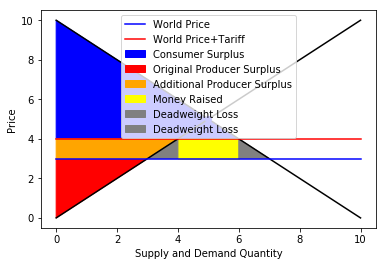

In [1]:
import sympy
import matplotlib.pyplot as plt
import matplotlib.patches as patches
p = sympy.Symbol("p")
class tariffModel:
    def __init__(self,demandEquation,supplyEquation,worldPrice,tariff):
        self.demandEquation = demandEquation
        self.supplyEquation = supplyEquation
        self.priceEnd = sympy.solve(demandEquation)[0]
        self.prices = []
        self.demandQ = []
        self.supplyQ = []
        for price in range(0,self.priceEnd+1):
            self.prices += [price]
            self.demandQ += [demandEquation.subs(p,price)]
            self.supplyQ += [supplyEquation.subs(p,price)]
        self.startingQ = sympy.solve(demandEquation-supplyEquation)[0]
        self.startingP = demandEquation.subs(p,self.startingQ)
        self.mode = "Normal"
        self.worldPrice = worldPrice
        self.tariff = tariff
        self.Q11 = supplyEquation.subs(p,worldPrice+tariff)
        self.Q21 = supplyEquation.subs(p,worldPrice)
        self.Q12 = demandEquation.subs(p,worldPrice+tariff)
        self.Q22 = demandEquation.subs(p,worldPrice)
    
    
    def plot(self):
        plt.plot(self.demandQ,self.prices,'k')
        plt.plot(self.supplyQ,self.prices,'k')
        plt.plot(self.startingQ,self.startingP, 'bo')
        plt.plot([0,self.priceEnd],[self.worldPrice,self.worldPrice],'b',label="World Price")
        plt.plot([0,self.priceEnd],[self.worldPrice+self.tariff,self.worldPrice+self.tariff],'r',label="World Price+Tariff")
        plt.xlabel("Supply and Demand Quantity")
        plt.ylabel("Price")
        

        triangle1 = patches.Polygon([[self.Q12,self.worldPrice+self.tariff],[0,self.priceEnd],[0,self.worldPrice+self.tariff]],True,label="Consumer Surplus", color="blue")
        triangle2 = patches.Polygon([[self.Q21,self.worldPrice],[0,0],[0,self.worldPrice]],True,label="Original Producer Surplus", color="red")
        polygon1 = patches.Polygon([[self.Q21,self.worldPrice],[self.Q11,self.worldPrice+self.tariff],[0,self.worldPrice+self.tariff],[0,self.worldPrice]],True,label="Additional Producer Surplus", color="orange")
        rectangle1 = patches.Polygon([[self.Q11,self.worldPrice+self.tariff],[self.Q12,self.worldPrice+self.tariff],[self.Q12,self.worldPrice],[self.Q11,self.worldPrice]],True,label="Money Raised", color="yellow")
        dead1 = patches.Polygon([[self.Q21,self.worldPrice],[self.Q11,self.worldPrice+self.tariff],[self.Q11,self.worldPrice]],True,label="Deadweight Loss", color="grey")
        dead2 = patches.Polygon([[self.Q22,self.worldPrice],[self.Q12,self.worldPrice+self.tariff],[self.Q12,self.worldPrice]],True,label="Deadweight Loss", color="grey")
        
        currentAxis = plt.gca()
        currentAxis.add_patch(triangle1)
        currentAxis.add_patch(triangle2)
        currentAxis.add_patch(polygon1)
        currentAxis.add_patch(rectangle1)
        currentAxis.add_patch(dead1)
        currentAxis.add_patch(dead2)
        plt.legend()
        plt.show()
economy1 = tariffModel(10-p,p,3,1)
economy1.plot()